In [1]:
# Caso de Estudio: Retención de Usuarios - FitNess App

In [2]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Aquí estaba el error, ahora está corregido
import os

print("✅ Motor listo.")

✅ Motor listo.


In [3]:
# 2. Configuración de ubicación y rutas (Seguro y Privado)
import os

# Definimos cómo se llama la carpeta de tu proyecto
nombre_buscado = "Proyecto-FitnessApp"

# Lógica para saltar a la carpeta del proyecto si el kernel inicia en la carpeta de usuario
if nombre_buscado not in os.getcwd():
    # Construimos la ruta dinámica al escritorio
    ruta_escritorio = os.path.join(os.path.expanduser("~"), "Desktop", "TUP-UTN", "Materias", "Intro-Analisis-Datos", nombre_buscado)
    
    if os.path.exists(ruta_escritorio):
        os.chdir(ruta_escritorio)

# AQUÍ SE DEFINE LA VARIABLE QUE TE FALTA
path_raw = 'data/raw'

# Verificación final
if os.path.exists(path_raw):
    print(f"✅ Entorno listo en el proyecto: [{os.path.basename(os.getcwd())}]")
    print(f"✅ Carpeta de datos validada: {path_raw}")
else:
    print("❌ ERROR: No se encuentra la carpeta 'data/raw'.")
    print("📍 Ubicación actual de Python:", os.path.basename(os.getcwd()))

✅ Entorno listo en el proyecto: [Proyecto-FitnessApp]
✅ Carpeta de datos validada: data/raw


In [4]:
# 3. Carga de datos y creación de copias de seguridad
try:
    # Carga desde la ruta relativa validada anteriormente
    actividad_raw = pd.read_csv(os.path.join(path_raw, 'actividad_usuarios.csv'))
    demografia_raw = pd.read_json(os.path.join(path_raw, 'datos_demograficos.json'))
    suscripciones_raw = pd.read_excel(os.path.join(path_raw, 'suscripciones_usuarios.xlsx'))
    progreso_raw = pd.read_csv(os.path.join(path_raw, 'progreso_planes.csv'))
    nutricion_raw = pd.read_excel(os.path.join(path_raw, 'interacciones_nutricion.xlsx'))

    # Creación de copias de trabajo (Checklist 1.3)
    df_actividad = actividad_raw.copy()
    df_demografia = demografia_raw.copy()
    df_suscripciones = suscripciones_raw.copy()
    df_progreso = progreso_raw.copy()
    df_nutricion = nutricion_raw.copy()

    print("✅ Datos cargados y copias de seguridad creadas exitosamente.")

except Exception as e:
    print(f"❌ Error al cargar los archivos: {e}")

✅ Datos cargados y copias de seguridad creadas exitosamente.


In [5]:
# 4. Validación de dimensiones de las tablas cargadas
tablas = {
    "Actividad": df_actividad, 
    "Demografía": df_demografia, 
    "Suscripciones": df_suscripciones, 
    "Progreso": df_progreso, 
    "Nutrición": df_nutricion
}

print("📊 RESUMEN DE CARGA: FitNess App")
print("-" * 35)
for nombre, df in tablas.items():
    print(f"{nombre:15}: {df.shape[0]:>6,} filas | {df.shape[1]} columnas")

📊 RESUMEN DE CARGA: FitNess App
-----------------------------------
Actividad      : 11,600 filas | 6 columnas
Demografía     :  1,000 filas | 6 columnas
Suscripciones  :  1,050 filas | 6 columnas
Progreso       :  2,025 filas | 6 columnas
Nutrición      :  1,200 filas | 5 columnas


In [6]:
# 5. Información técnica de la tabla principal (Actividad)
print("🔎 DIAGNÓSTICO TÉCNICO: TABLA ACTIVIDAD")
print("-" * 40)
df_actividad.info()

# Verificación rápida de valores nulos
print("\n❓ VALORES NULOS:")
print(df_actividad.isnull().sum())

🔎 DIAGNÓSTICO TÉCNICO: TABLA ACTIVIDAD
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11600 entries, 0 to 11599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Actividad      11600 non-null  object 
 1   ID_Usuario        11600 non-null  object 
 2   Fecha_Actividad   11600 non-null  object 
 3   Tipo_Evento       11600 non-null  object 
 4   Duracion_Minutos  11253 non-null  float64
 5   ID_Contenido      11368 non-null  object 
dtypes: float64(1), object(5)
memory usage: 543.9+ KB

❓ VALORES NULOS:
ID_Actividad          0
ID_Usuario            0
Fecha_Actividad       0
Tipo_Evento           0
Duracion_Minutos    347
ID_Contenido        232
dtype: int64


In [7]:
# 6. Transformación de fechas para análisis de retención
df_actividad['Fecha_Actividad'] = pd.to_datetime(df_actividad['Fecha_Actividad'])

print(f"✅ 'Fecha_Actividad' convertida a: {df_actividad['Fecha_Actividad'].dtype}")
print(f"📅 Rango del estudio: {df_actividad['Fecha_Actividad'].min().date()} al {df_actividad['Fecha_Actividad'].max().date()}")

✅ 'Fecha_Actividad' convertida a: datetime64[ns]
📅 Rango del estudio: 2024-09-12 al 2025-09-12


In [8]:
# 7. Validación de Identificadores Únicos (Checklist Semana 1)
usuarios_actividad = df_actividad['ID_Usuario'].nunique()
usuarios_demografia = df_demografia['ID_Usuario'].nunique()

# Usuarios que están en actividad pero NO en demografía
usuarios_sin_perfil = set(df_actividad['ID_Usuario']) - set(df_demografia['ID_Usuario'])

print(f"👤 Usuarios únicos en Actividad: {usuarios_actividad}")
print(f"👤 Usuarios únicos en Demografía: {usuarios_demografia}")
print(f"⚠️ Usuarios con actividad pero sin datos demográficos: {len(usuarios_sin_perfil)}")

👤 Usuarios únicos en Actividad: 6115
👤 Usuarios únicos en Demografía: 1000
⚠️ Usuarios con actividad pero sin datos demográficos: 5115


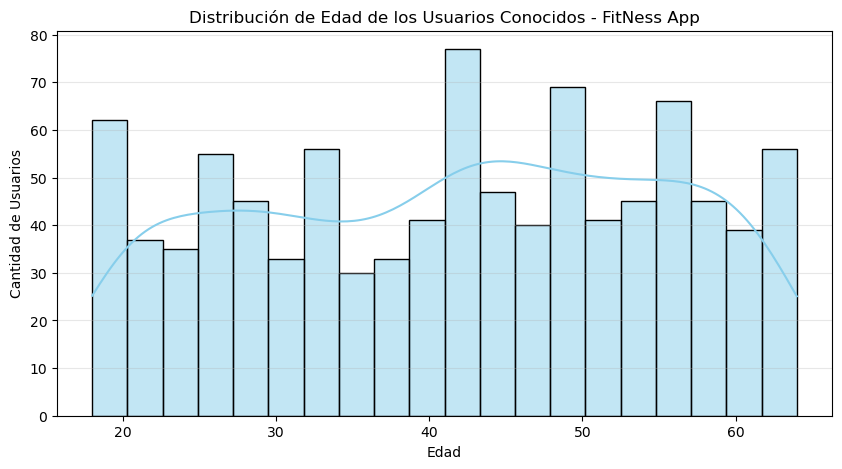

📊 Edad promedio: 41.6 años


In [9]:
# 8. Análisis de Edades (Basado en los 1,000 perfiles conocidos)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_demografia['Edad'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edad de los Usuarios Conocidos - FitNess App')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"📊 Edad promedio: {df_demografia['Edad'].mean():.1f} años")

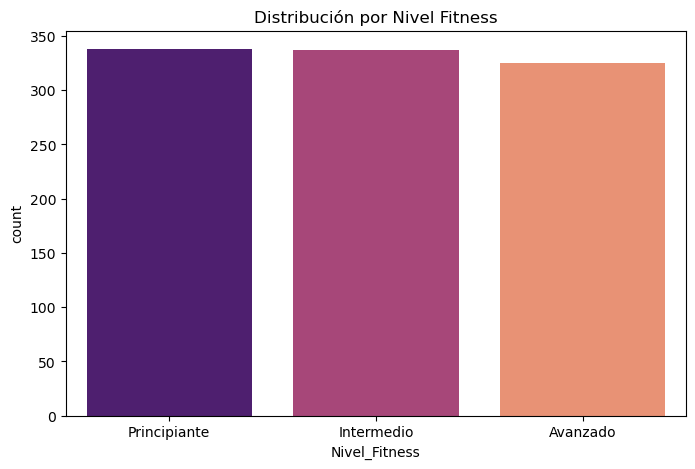

In [12]:
# 9. Segmentación por Nivel Fitness (Corregido)
plt.figure(figsize=(8, 5))
# Agregamos hue='Nivel_Fitness' y legend=False para cumplir con las nuevas reglas de Seaborn
sns.countplot(data=df_demografia, x='Nivel_Fitness', hue='Nivel_Fitness', 
              palette='magma', order=['Principiante', 'Intermedio', 'Avanzado'], 
              legend=False)
plt.title('Distribución por Nivel Fitness')
plt.show()

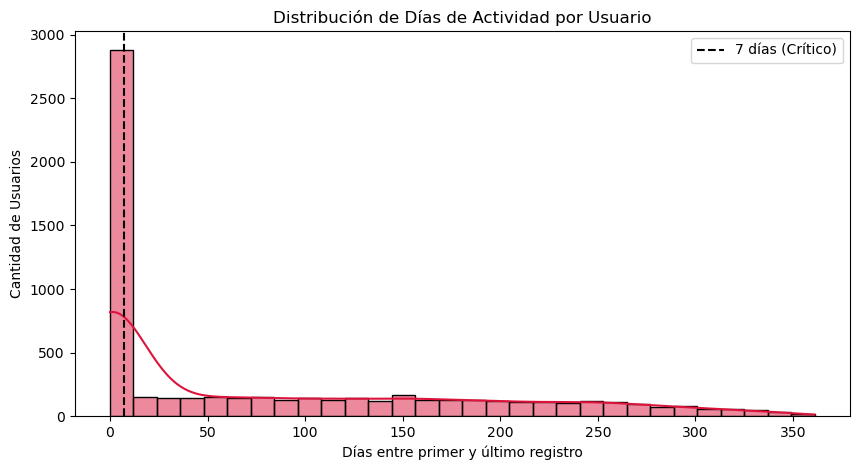

⚠️ Alerta: 2836 usuarios (46.4%) abandonaron en los primeros 7 días.


In [11]:
# 10. Análisis de Retención: El "Pico de la Muerte"
# Calculamos la duración de la relación del usuario con la app
primer_uso = df_actividad.groupby('ID_Usuario')['Fecha_Actividad'].min()
ultimo_uso = df_actividad.groupby('ID_Usuario')['Fecha_Actividad'].max()
vida_usuario = (ultimo_uso - primer_uso).dt.days

# Graficamos
plt.figure(figsize=(10, 5))
sns.histplot(vida_usuario, bins=30, color='crimson', kde=True)
plt.axvline(7, color='black', linestyle='--', label='7 días (Crítico)')
plt.title('Distribución de Días de Actividad por Usuario')
plt.xlabel('Días entre primer y último registro')
plt.ylabel('Cantidad de Usuarios')
plt.legend()
plt.show()

usuarios_7dias = (vida_usuario <= 7).sum()
porcentaje_abandono = (usuarios_7dias / df_actividad['ID_Usuario'].nunique()) * 100
print(f"⚠️ Alerta: {usuarios_7dias} usuarios ({porcentaje_abandono:.1f}%) abandonaron en los primeros 7 días.")